In [2]:
!pip install -q mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.5 MB/s eta 0:00:00


In [ ]:
!pip install -q fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.1 MB/s eta 0:00:00

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import time
import textwrap
import os
import random

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from PIL import Image
from mlcroissant import Dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# for coco dataset
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

### Download data to disk

In [7]:
# Download annotations (captions)
!wget https://huggingface.co/datasets/nlphuji/flickr30k/resolve/main/flickr_annotations_30k.csv

--2024-11-09 02:37:17--  https://huggingface.co/datasets/nlphuji/flickr30k/resolve/main/flickr_annotations_30k.csv
Resolving huggingface.co (huggingface.co)... 18.164.174.118, 18.164.174.17, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/55/8b/558bef0bef5ef96807a371a60a509b6dca1f1f70b915af0c5ee35a2c92684941/395990db603ab8bafd5c7ab2746b22058bb1e75b78b3eb56ad755931364ac137?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27flickr_annotations_30k.csv%3B+filename%3D%22flickr_annotations_30k.csv%22%3B&response-content-type=text%2Fcsv&Expires=1731379037&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMTM3OTAzN319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy81NS84Yi81NThiZWYwYmVmNWVmOTY4MDdhMzcxYTYwYTUwOWI2ZGNhMWYxZjcwYjkxNWFmMGM1ZWUzNWEyYzkyNjg0OTQxLzM5NTk5MGRiNjAzYWI4YmFmZDVjN2FiMjc0NmIyMjA1

In [8]:
# Download images
!wget https://huggingface.co/datasets/nlphuji/flickr30k/resolve/main/flickr30k-images.zip

--2024-11-09 02:38:12--  https://huggingface.co/datasets/nlphuji/flickr30k/resolve/main/flickr30k-images.zip
Resolving huggingface.co (huggingface.co)... 18.164.174.23, 18.164.174.55, 18.164.174.118, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/55/8b/558bef0bef5ef96807a371a60a509b6dca1f1f70b915af0c5ee35a2c92684941/2ce2420c0d17f0531deaa89ac657b4d5067ec519da16ff1ea12acbf5619c7391?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27flickr30k-images.zip%3B+filename%3D%22flickr30k-images.zip%22%3B&response-content-type=application%2Fzip&Expires=1731379092&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMTM3OTA5Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy81NS84Yi81NThiZWYwYmVmNWVmOTY4MDdhMzcxYTYwYTUwOWI2ZGNhMWYxZjcwYjkxNWFmMGM1ZWUzNWEyYzkyNjg0OTQxLzJjZTI0MjBjMGQxN2YwNTMxZGVhYTg5YWM2NTdiNGQ1MDY3ZWM1MTlk

In [9]:
!unzip flickr30k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k-images/434938585.jpg  
  inflating: __MACOSX/flickr30k-images/._434938585.jpg  
  inflating: flickr30k-images/3260088697.jpg  
  inflating: __MACOSX/flickr30k-images/._3260088697.jpg  
  inflating: flickr30k-images/4857774876.jpg  
  inflating: __MACOSX/flickr30k-images/._4857774876.jpg  
  inflating: flickr30k-images/4410008455.jpg  
  inflating: __MACOSX/flickr30k-images/._4410008455.jpg  
  inflating: flickr30k-images/2931392634.jpg  
  inflating: __MACOSX/flickr30k-images/._2931392634.jpg  
  inflating: flickr30k-images/3066429707.jpg  
  inflating: __MACOSX/flickr30k-images/._3066429707.jpg  
  inflating: flickr30k-images/350426761.jpg  
  inflating: __MACOSX/flickr30k-images/._350426761.jpg  
  inflating: flickr30k-images/6141695796.jpg  
  inflating: __MACOSX/flickr30k-images/._6141695796.jpg  
  inflating: flickr30k-images/149806768.jpg  
  inflating: __MACOSX/flickr30k-images/._149806768.jpg  
  inflatin

In [10]:
# Load annotations and image metadata into a dataframe
flickr30k_df = pd.read_csv("flickr_annotations_30k.csv")
display(flickr30k_df.head())
flickr30k_df.info()

,raw,sentids,split,filename,img_id
0,"[""Two young guys with shaggy hair look at thei...","[0, 1, 2, 3, 4]",train,1000092795.jpg,0
1,"[""Several men in hard hats are operating a gia...","[5, 6, 7, 8, 9]",train,10002456.jpg,1
2,"[""A child in a pink dress is climbing up a set...","[10, 11, 12, 13, 14]",train,1000268201.jpg,2
3,"[""Someone in a blue shirt and hat is standing ...","[15, 16, 17, 18, 19]",train,1000344755.jpg,3
4,"[""Two men, one in a gray shirt, one in a black...","[20, 21, 22, 23, 24]",train,1000366164.jpg,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31014 entries, 0 to 31013
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   raw       31014 non-null  object
 1   sentids   31014 non-null  object
 2   split     31014 non-null  object
 3   filename  31014 non-null  object
 4   img_id    31014 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


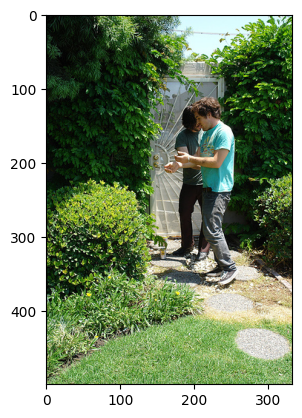

In [14]:
img = Image.open("flickr30k-images/1000092795.jpg")
plt.imshow(img)
plt.show()

### Flickr30k/Croissant

In [ ]:
# Download Flickr30k metadata from hugging face
flickr30k_ds = Dataset(jsonld="https://huggingface.co/api/datasets/nlphuji/flickr30k/croissant")
records = flickr30k_ds.records("TEST")
records

  -  [Metadata(flickr30k)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/license" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/version" is recommended, but does not exist.


Records(dataset=Dataset(jsonld='https://huggingface.co/api/datasets/nlphuji/flickr30k/croissant', operations=OperationGraph(issues=Issues(_errors=set(), _warnings={('Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.', Metadata(uuid="_:Ne243f5c0e89746ba8ee3f4b3384479a9")), ('Property "https://schema.org/version" is recommended, but does not exist.', Metadata(uuid="_:Ne243f5c0e89746ba8ee3f4b3384479a9")), ('Property "https://schema.org/license" is recommended, but does not exist.', Metadata(uuid="_:Ne243f5c0e89746ba8ee3f4b3384479a9")), ('Property "https://schema.org/datePublished" is recommended, but does not exist.', Metadata(uuid="_:Ne243f5c0e89746ba8ee3f4b3384479a9"))}), operations=<mlcroissant._src.operation_graph.base_operation.Operations object at 0x7deab1d2e020>), metadata=Metadata(uuid="_:Ne243f5c0e89746ba8ee3f4b3384479a9"), debug=False, mapping=None), record_set='TEST', filters=None, debug=False)

In [ ]:
# Print the names of the available record sets
record_sets = flickr30k_ds.metadata.record_sets
print(record_sets)

[RecordSet(uuid="TEST")]


In [ ]:
# Load the image metadata and captions into a dataframe
# NOTE: This does not actually load the images, just a pointer to them
flickr30k_df = pd.DataFrame(flickr30k_ds.records(record_set=record_sets[0].uuid))
display(flickr30k_df.head())
flickr30k_df.info()

,TEST/image,TEST/caption,TEST/sentids,TEST/split,TEST/img_id,TEST/filename
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Two young guys with shaggy hair look at the...,"[b'0', b'1', b'2', b'3', b'4']",b'train',b'0',b'1000092795.jpg'
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Several men in hard hats are operating a gi...,"[b'5', b'6', b'7', b'8', b'9']",b'train',b'1',b'10002456.jpg'
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A child in a pink dress is climbing up a se...,"[b'10', b'11', b'12', b'13', b'14']",b'train',b'2',b'1000268201.jpg'
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Someone in a blue shirt and hat is standing...,"[b'15', b'16', b'17', b'18', b'19']",b'train',b'3',b'1000344755.jpg'
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[b'Two men, one in a gray shirt, one in a blac...","[b'20', b'21', b'22', b'23', b'24']",b'train',b'4',b'1000366164.jpg'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31014 entries, 0 to 31013
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TEST/image     31014 non-null  object
 1   TEST/caption   31014 non-null  object
 2   TEST/sentids   31014 non-null  object
 3   TEST/split     31014 non-null  object
 4   TEST/img_id    31014 non-null  object
 5   TEST/filename  31014 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


### Exploratory Data Analysis

In [ ]:
flickr30k_df["cleaned_captions"] = flickr30k_df["TEST/caption"].apply(lambda x: [str(caption)[2:-1].lower() for caption in x])
flickr30k_df[["TEST/caption", "cleaned_captions"]].head()

,TEST/caption,cleaned_captions
0,[b'Two young guys with shaggy hair look at the...,[two young guys with shaggy hair look at their...
1,[b'Several men in hard hats are operating a gi...,[several men in hard hats are operating a gian...
2,[b'A child in a pink dress is climbing up a se...,[a child in a pink dress is climbing up a set ...
3,[b'Someone in a blue shirt and hat is standing...,[someone in a blue shirt and hat is standing o...
4,"[b'Two men, one in a gray shirt, one in a blac...","[two men, one in a gray shirt, one in a black ..."


In [ ]:
flickr30k_df["cleaned_captions"].iloc[0][0]

'two young guys with shaggy hair look at their hands while hanging out in the yard.'

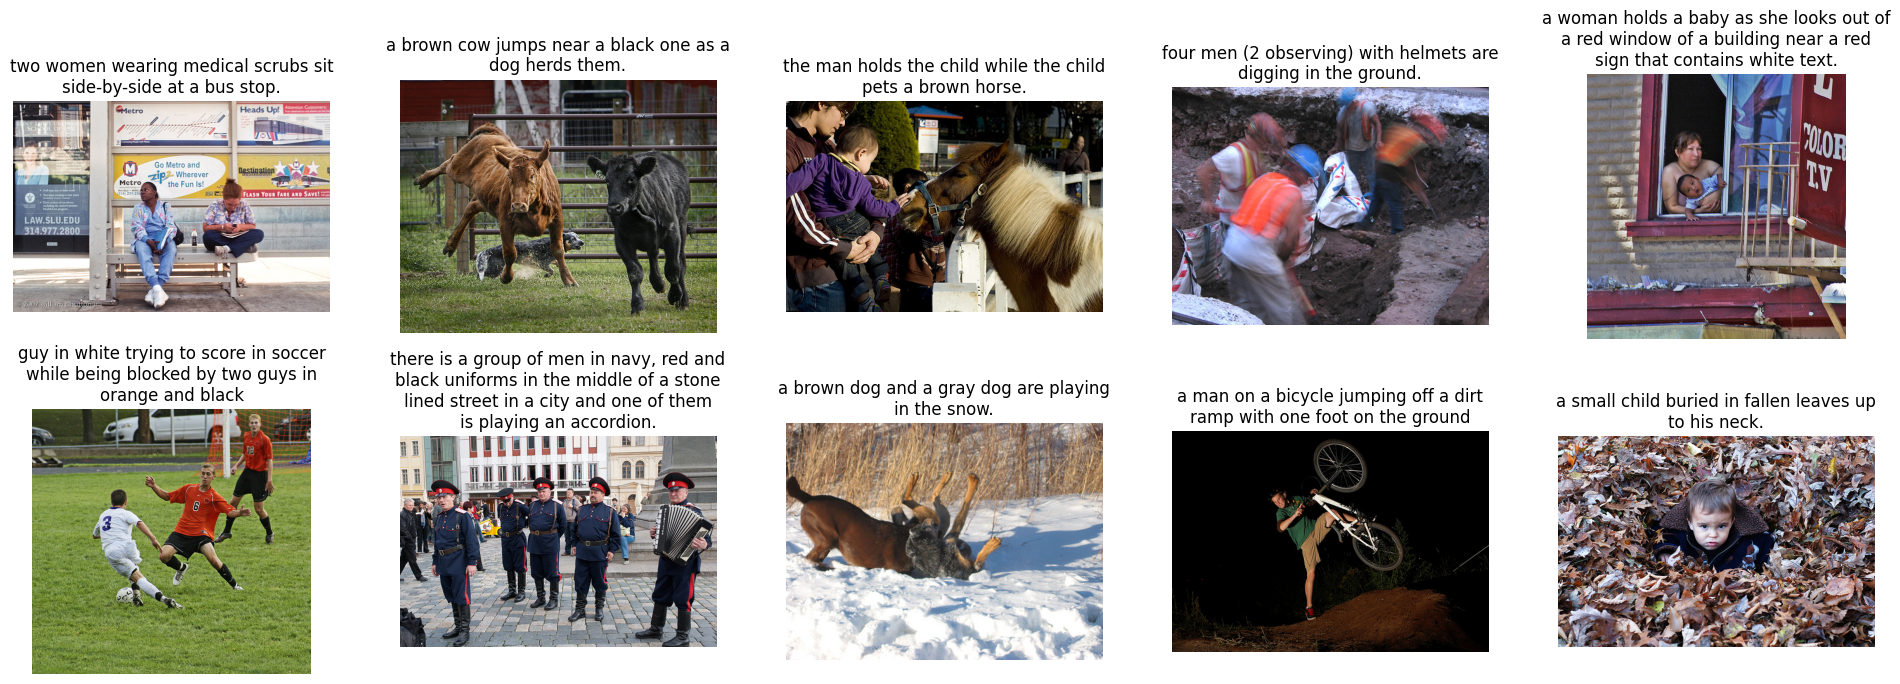

In [ ]:
# Print a random sample of 10 images and their captions
rs = flickr30k_df.sample(n=10)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

axs = axs.flatten()

for i, ax in enumerate(axs):
  ax.imshow(rs["TEST/image"].iloc[i])
  caption = rs["cleaned_captions"].iloc[i][0]
  ax.set_title(textwrap.fill(caption, width=40))
  ax.set_axis_off()

fig.tight_layout(pad=5.0)
plt.show()

In [ ]:
# Get all of the captions for EDA
all_captions = [caption for captions in flickr30k_df["cleaned_captions"] for caption in captions]
all_captions[:5]

['two young guys with shaggy hair look at their hands while hanging out in the yard.',
 'two young, white males are outside near many bushes.',
 'two men in green shirts are standing in a yard.',
 'a man in a blue shirt standing in a garden.',
 'two friends enjoy time spent together.']

Total number of captions: 155070
Mean caption length: 63.2
Median caption length: 58.0
Caption length standard dev: 26.68
Min length: 7
Q1: 45.0
Q3: 75.0
Max length: 402


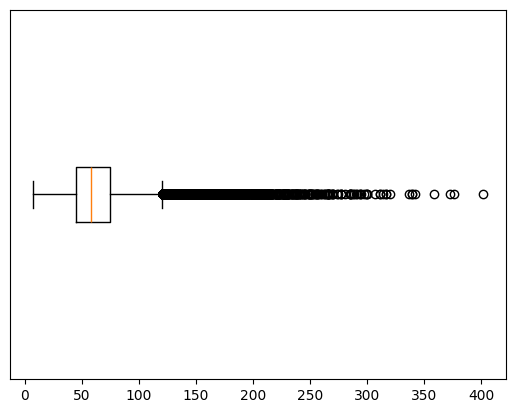

In [ ]:
# Compute descriptive statistics for the captions
print(f"Total number of captions: {len(all_captions)}")

caption_lengths = [len(caption) for caption in all_captions]

print(f"Mean caption length: {np.round(np.mean(caption_lengths), 2)}")
print(f"Median caption length: {np.median(caption_lengths)}")
print(f"Caption length standard dev: {np.round(np.std(caption_lengths), 2)}")
print(f"Min length: {np.min(caption_lengths)}")
print(f"Q1: {np.quantile(caption_lengths, 0.25)}")
print(f"Q3: {np.quantile(caption_lengths, 0.75)}")
print(f"Max length: {np.max(caption_lengths)}")

plt.boxplot(caption_lengths, vert=0)
plt.yticks([])
plt.show()

In [ ]:
# Find non-alphabetic characters in the captions
unique_chars = {char for caption in all_captions for char in caption if not char.isalpha()}
print(unique_chars)

{'%', '4', '`', '7', '5', '2', '1', '=', '$', ',', '?', '8', ' ', ';', '(', '@', '"', '+', '-', '\\', "'", '9', ':', '3', ')', '6', '&', '0', '#', '.', '!'}


In [ ]:
# Inspect instances of captions that use non-alphabetic characters
[caption for caption in all_captions if "#" in caption][:5]

['a uh football player, #15, stands near the edge of the field ready to throw the ball while his teammate blocks an opponent.',
 'a little-league baseball player, wearing a white #19 jersey, successfully hits the ball.',
 'a football player is in a red and white uniform sooners #28.',
 'a black greyhound, with a green and white jersey (#7) is running on a track.',
 'the #2 greyhound dog is running around a track.']

In [ ]:
[caption for caption in all_captions if "@" in caption]

['@ men are kneeling with their hands in front of them.',
 '@ people are cleaning windows in a dark environment.',
 '@ males wearing a black shirt and a brown shirt are looking at vegetation.']

In [ ]:
[caption for caption in all_captions if "%" in caption][:5]

['man outside in the rain promoting a 50 % off sale.',
 'an elderly man held the "college krugt diners en 3 %" sign as he stood near the brick building.',
 'a group of women are all sitting in a department store looking at some papers or booklets, and a large sign indicates 40 % off sale.',
 '2 men getting ready to cross the street under the 25 % off sign.',
 '2 rows of woman walking towards each other on the sidewalk outside of a store with a boy 50 % sign on the golden framed windows.']

In [ ]:
[caption for caption in all_captions if "=" in caption]

['two young children rif=ding sleds down the snow.',
 'people passing through an open market, while an older woman leans in front of a chilled bin on=f seafood.']

In [ ]:
[caption for caption in all_captions if "+" in caption]

['a chinese + man and younger boy in some type of worship place worshiping.',
 'an elderly woman wearing a green parka +is walking with a cane near an intersection.',
 '8+ people sitting on wood benches are viewing 8 people in brown.']

In [ ]:
[caption for caption in all_captions if "&" in caption][:5]

['grocery store employee, dressed in a red apron &amp; a baseball cap, sits on a ledge in front of the store.',
 'two ladies are cooking &amp; talking and two gentlemen are talking in the opposite site of the kitchen.',
 'a woman in a black shirt sitting behind a booth with a sign that reads "programmes &amp; ice cream."',
 'eight gentlemen are working with stone &amp; tile.',
 'a dozen workers wearing uniforms &amp; sanitation hats are working on an assembly line in a factory.']

In [ ]:
[caption for caption in all_captions if "?" in caption][:5]

['a crowd admiring modern art?',
 'the green team lifts a player up in victory after a hard game, but will the red team interfere?',
 'it takes a real man to clean a bucket with who knows what in it?',
 "that hotdog just wasn't going down right, was it the drinking or the burnt dog?",
 'people walking through a short tunnel with "where are you?" written on the wall.']

In [ ]:
[caption for caption in all_captions if "\\" in caption][:5]

['s large man in a blue shirt and shorts leaning against a van in front of a store called "terrible\\\'s"',
 'a man in a blue shirt and jeans stands behind a sign that says "mark \\\'mom\\\' finley ".',
 'a lady sitting in a chair is inflating a child\\\'s "hulk" toy.',
 'a woman in a blue winter coat and a person in a black winter vest are crossing the street when the "don\\\'t walk" sign is lit.',
 'a man and a woman look at pictures on a machine marked "other people\\\'s photographs."']

In [ ]:
[caption for caption in all_captions if "1" in caption][:5]

['a man in an orange shirt sings for the crowd below a sign that says lucky 13.',
 'a photographer takes a picture of a group of one girl in a pink dress and 10 boys in suits and hats.',
 'a group of 11 people in winter wear such as beanies, skiing jackets, gloves and backpacks are standing in snow paddles outside a house made of ice blocks while a person in front of the door seems to be leading them.',
 'a group of 11 smiling kids and young teens are divided into two groups, in a large, indoor swimming pool, with the back person in each group holding their arms up.',
 'in this picture we have about 11 girls posing for a picture in a pool.']

In [ ]:
# NOTE (from Juliet): I think for preprocessing we should only be converting the byte strings to strings, removing any extra whitespace, and adding start and end tokens.
# Anything beyond this loses information, for instance removing digits will mess up any numerical descriptions. We could revist this after training the model and potentially remove other special characters
# or convert to lowercase if the model isn't performing well

# Will need to use a different tokenizer when using pretrained language models for the text embedding

def create_vocabulary(captions):
  unique_tokens = set()
  special_tokens = ["<START>", "<END>"]
  unique_tokens.update(special_tokens)
  for caption in captions:
    caption_tokens = word_tokenize(caption)
    unique_tokens.update(caption_tokens)
  return unique_tokens

# Test on the first caption
single_caption_vocab = create_vocabulary(all_captions[:1])
print(all_captions[:1])
print(single_caption_vocab)

['two young guys with shaggy hair look at their hands while hanging out in the yard.']
{'hands', 'shaggy', 'their', 'out', 'guys', 'in', 'at', 'hair', 'while', '<END>', 'two', 'hanging', 'with', 'young', 'look', 'the', '<START>', 'yard', '.'}


In [ ]:
full_vocab = create_vocabulary(all_captions)
print(len(full_vocab))

In [ ]:
class CaptionEncoder:
  def __init__(self, vocab, seq_length):
    self.vocab = vocab
    self.vocab_size = len(vocab)
    self.seq_length = seq_length

    # ID 0 is reserved for padding
    self.token_to_id = {token: id+1 for id, token in enumerate(vocab)}
    self.id_to_token = {id: token for token, id in self.token_to_id.items()}

  def encode(self, caption):
    caption_tokens = ["<START>"] + word_tokenize(caption)
    encoding = [self.token_to_id[token] for token in caption_tokens]

    if len(encoding) < self.seq_length-1:
      padding = [0] * (self.seq_length - 1 - len(encoding))
      encoding.extend(padding)
    else:
      encoding = encoding[:self.seq_length-1]

    end_token = self.token_to_id["<END>"]
    encoding.extend([end_token])

    return encoding

  def decode(self, encoding):
    return [self.id_to_token[id] for id in encoding if id != 0]


In [ ]:
encoder = CaptionEncoder(single_caption_vocab, 25)
print(encoder.token_to_id)
print(encoder.id_to_token)

{'hair': 1, 'two': 2, 'out': 3, 'the': 4, 'in': 5, 'young': 6, 'while': 7, 'their': 8, '<START>': 9, 'at': 10, 'shaggy': 11, '<END>': 12, 'look': 13, 'hands': 14, 'yard': 15, '.': 16, 'guys': 17, 'with': 18, 'hanging': 19}
{1: 'hair', 2: 'two', 3: 'out', 4: 'the', 5: 'in', 6: 'young', 7: 'while', 8: 'their', 9: '<START>', 10: 'at', 11: 'shaggy', 12: '<END>', 13: 'look', 14: 'hands', 15: 'yard', 16: '.', 17: 'guys', 18: 'with', 19: 'hanging'}


In [ ]:
encoded_caption = encoder.encode(all_captions[0])
print(encoded_caption)
print(encoder.decode(encoded_caption))

[9, 2, 6, 17, 18, 11, 1, 13, 10, 8, 14, 7, 19, 3, 5, 4, 15, 16, 0, 0, 0, 0, 0, 0, 12]
['<START>', 'two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.', '<END>']


In [ ]:
token_to_id = {token: id+1 for id, token in enumerate(single_caption_vocab)}
id_to_token = {id: token for token, id in token_to_id.items()}

cap = all_captions[0]
caption_tokens = ["<START>"] + word_tokenize(cap)
print(caption_tokens)

seq_length = 19
print(len(caption_tokens))
encoding = [token_to_id[token] for token in caption_tokens]
print(encoding)
if len(encoding) < seq_length-1:
  padding = [0] * (seq_length - 1 - len(encoding))
  encoding.extend(padding)
  print(padding)
else:
  encoding = encoding[:seq_length-1]

end_token = token_to_id["<END>"]
print(end_token)
encoding.extend([end_token])
print(encoding)
print(len(encoding))

decoded_caption = [id_to_token[id] for id in encoding if id != 0]
print(decoded_caption)

['<START>', 'two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.']
18
[9, 2, 6, 17, 18, 11, 1, 13, 10, 8, 14, 7, 19, 3, 5, 4, 15, 16]
12
[9, 2, 6, 17, 18, 11, 1, 13, 10, 8, 14, 7, 19, 3, 5, 4, 15, 16, 12]
19
['<START>', 'two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.', '<END>']


In [ ]:
caption_encoder = CaptionEncoder(full_vocab, 120)

In [ ]:
test_caption = all_captions[5]
print(test_caption)
encoding = caption_encoder.encode(test_caption)
print(encoding)
print(caption_encoder.decode(encoding))

several men in hard hats are operating a giant pulley system.
[6971, 3942, 18906, 10015, 11710, 2909, 16488, 11132, 10291, 9200, 12003, 19347, 8167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6519]
['<START>', 'several', 'men', 'in', 'hard', 'hats', 'are', 'operating', 'a', 'giant', 'pulley', 'system', '.', '<END>']


In [ ]:
#Preprocess Captions:
def preprocess_captions(flickr30k_df):
  for index, row in flickr30k_df.iterrows():
    caption = str(row["TEST/caption"][0])
    #remove b' in each caption
    caption = caption[2:]
    #Convert Caption to lowercase
    caption = caption.lower()

    # Delete digits and special chars
    caption = caption.replace("[^A-Za-z]", "")

    #Remove extra spaces
    caption = caption.replace("\s+", " ")
    #remove all single letter words in caption
    caption = "<start> " + " ".join([word for word in caption.split() if len(word)>1]) + " <end>"
    flickr30k_df.at[index, "TEST/preprocessed_caption"] = caption

In [ ]:
preprocess_captions(flickr30k_df)

In [ ]:
display(flickr30k_df.head())
flickr30k_df.info()

,TEST/image,TEST/caption,TEST/sentids,TEST/split,TEST/img_id,TEST/filename,cleaned_captions,TEST/preprocessed_caption
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Two young guys with shaggy hair look at the...,"[b'0', b'1', b'2', b'3', b'4']",b'train',b'0',b'1000092795.jpg',[two young guys with shaggy hair look at their...,<start> two young guys with shaggy hair look a...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Several men in hard hats are operating a gi...,"[b'5', b'6', b'7', b'8', b'9']",b'train',b'1',b'10002456.jpg',[several men in hard hats are operating a gian...,<start> several men in hard hats are operating...
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A child in a pink dress is climbing up a se...,"[b'10', b'11', b'12', b'13', b'14']",b'train',b'2',b'1000268201.jpg',[a child in a pink dress is climbing up a set ...,<start> child in pink dress is climbing up set...
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Someone in a blue shirt and hat is standing...,"[b'15', b'16', b'17', b'18', b'19']",b'train',b'3',b'1000344755.jpg',[someone in a blue shirt and hat is standing o...,<start> someone in blue shirt and hat is stand...
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[b'Two men, one in a gray shirt, one in a blac...","[b'20', b'21', b'22', b'23', b'24']",b'train',b'4',b'1000366164.jpg',"[two men, one in a gray shirt, one in a black ...","<start> two men, one in gray shirt, one in bla..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31014 entries, 0 to 31013
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TEST/image                 31014 non-null  object
 1   TEST/caption               31014 non-null  object
 2   TEST/sentids               31014 non-null  object
 3   TEST/split                 31014 non-null  object
 4   TEST/img_id                31014 non-null  object
 5   TEST/filename              31014 non-null  object
 6   cleaned_captions           31014 non-null  object
 7   TEST/preprocessed_caption  31014 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [ ]:
np.unique(flickr30k_df["TEST/split"])

array([b'test', b'train', b'val'], dtype=object)

In [ ]:
# Split data into train test and val sets
train_df = flickr30k_df[flickr30k_df["TEST/split"] == b'train']
print(train_df.info())

test_df = flickr30k_df[flickr30k_df["TEST/split"] == b'test']
print(test_df.info())

val_df = flickr30k_df[flickr30k_df["TEST/split"] == b'val']
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 0 to 31013
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TEST/image                 29000 non-null  object
 1   TEST/caption               29000 non-null  object
 2   TEST/sentids               29000 non-null  object
 3   TEST/split                 29000 non-null  object
 4   TEST/img_id                29000 non-null  object
 5   TEST/filename              29000 non-null  object
 6   cleaned_captions           29000 non-null  object
 7   TEST/preprocessed_caption  29000 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 25 to 30943
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TEST/image                 1000 non-null   object
 1   TEST/caption               10

In [ ]:
# Define a data generator to load and preprocess the images and captions in
# batches to manage memory constraints
def data_generator_from_croissant(df, im_width, im_height, batch_size=32):
  while True:
    data = df.sample(n=batch_size)
    images = data["TEST/image"]
    image_tensors = [tf.convert_to_tensor(img) for img in images]
    image_tensors = [tf.image.resize(img, [im_width, im_height]) for img in image_tensors]
    image_tensors = [img/255.0 for img in image_tensors]

    image_captions = []
    batch_captions = data["cleaned_captions"]
    for captions in batch_captions:
      caption_idx = random.randint(0, 4)
      caption = captions[caption_idx]

      encoding = caption_encoder.encode(caption)
      image_captions.append(caption)

    yield np.array(image_tensors), np.array(image_captions)

In [ ]:
images, captions = next(data_generator_from_croissant(train_df, 224, 224, batch_size=64))

a young blond male child in a yellow and red shirt is cutting paper with scissors.


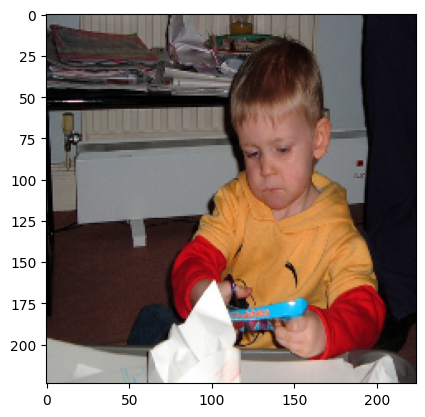

In [ ]:
print(captions[0])
plt.imshow(images[0])
plt.show()

In [ ]:
train_df["TEST/caption"].iloc[0][4]

b'Two friends enjoy time spent together.'

In [ ]:
idx = 10
bs = 64
low = idx * bs
high = min(low + bs, len(train_df))
batch = train_df[low:high]

In [ ]:
batch.head()

,TEST/image,TEST/caption,TEST/sentids,TEST/split,TEST/img_id,TEST/filename,cleaned_captions,TEST/preprocessed_caption
702,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A dog is wearing a red number 6 and running...,"[b'3510', b'3511', b'3512', b'3513', b'3514']",b'train',b'702',b'1240297429.jpg',[a dog is wearing a red number 6 and running t...,<start> dog is wearing red number and running ...
703,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A woman in a brown shirt is about to releas...,"[b'3515', b'3516', b'3517', b'3518', b'3519']",b'train',b'703',b'124106477.jpg',[a woman in a brown shirt is about to release ...,<start> woman in brown shirt is about to relea...
704,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[b'Two men, one looking at a screen with a dru...","[b'3520', b'3521', b'3522', b'3523', b'3524']",b'train',b'704',b'124145159.jpg',"[two men, one looking at a screen with a drum ...","<start> two men, one looking at screen with dr..."
705,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A large brown horse stands over a small bla...,"[b'3525', b'3526', b'3527', b'3528', b'3529']",b'train',b'705',b'124195430.jpg',[a large brown horse stands over a small black...,<start> large brown horse stands over small bl...
706,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A young boy watching and admiring puppets i...,"[b'3530', b'3531', b'3532', b'3533', b'3534']",b'train',b'706',b'1242394484.jpg',[a young boy watching and admiring puppets in ...,<start> young boy watching and admiring puppet...


In [ ]:
# Simulate a run of 10 epochs to test that the data generator will run through
# all of the images without crashing
batch_size = 128
batches_per_epoch = int(np.ceil(len(train_df)/batch_size))
num_epochs = 10

train_generator = data_generator_from_croissant(train_df, 224, 224, batch_size=batch_size)

test_start_time = time.time()
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}/{num_epochs}")
  print("Generating batches...")
  epoch_start_time = time.time()

  for batch_idx in range(batches_per_epoch):
    batch = next(train_generator)

  epoch_end_time = time.time()
  print(f"Completed in {np.round((epoch_end_time - epoch_start_time), 3)} s")

test_end_time = time.time()
print(f"Test completed in {np.round((test_end_time - test_start_time), 3)} s.")

NameError: name 'train_df' is not defined

In [ ]:
class CroissantDataGenerator(tf.keras.utils.Sequence):
  def __init__(self, df, im_width, im_height, batch_size=32, shuffle=True):
    self.data = df
    self.im_width = im_width
    self.im_height = im_height
    self.batch_size = batch_size
    self.shuffle = shuffle

  def __getitem__(self, idx):
    low = idx * self.batch_size
    high = min(low + self.batch_size, len(self.data))
    batch = self.data[low:high]

    images = batch["TEST/image"]
    image_tensors = [tf.convert_to_tensor(img) for img in images]
    image_tensors = [tf.image.resize(img, [self.im_width, self.im_height]) for img in image_tensors]
    image_tensors = [img/255.0 for img in image_tensors]

    image_captions = []
    batch_captions = batch["cleaned_captions"]
    for captions in batch_captions:
      caption_idx = random.randint(0, 4)
      caption = captions[caption_idx]
      encoding = caption_encoder.encode(caption)
      image_captions.append(encoding)

    return np.array(image_tensors), np.array(image_captions)

  def __len__(self):
    return int(np.ceil(len(self.data) / float(self.batch_size)))

  def on_epoch_end(self):
    if self.shuffle:
      self.data = self.data.sample(frac=1).reset_index(drop=True)

In [ ]:
train_generator = CroissantDataGenerator(train_df, 224, 224, batch_size=64)

In [ ]:
len(train_generator)

454

In [ ]:
img_batch, caption_batch = train_generator[1]
print(img_batch.shape)
print(caption_batch.shape)

(64, 224, 224, 3)
(64, 120)


[11801 15867 15936  9075  2440  2026 15867 15472  6705  1976 15867 15916
  4213  9023     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0 17462]
['<START>', 'a', 'woman', 'is', 'looking', 'through', 'a', 'telescope', 'while', 'wearing', 'a', 'red', 'coat', '.', '<END>']


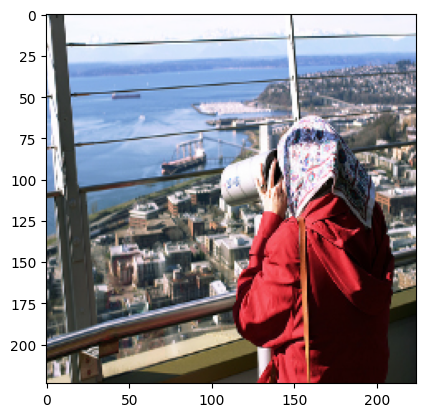

In [ ]:
print(caption_batch[0])
print(caption_encoder.decode(caption_batch[0]))
plt.imshow(img_batch[0])
plt.show()

In [ ]:
np.ceil(len(train_df)/64)

NameError: name 'train_df' is not defined

In [ ]:
next(data_generator_from_croissant(train_df, 224, 224, batch_size=64)).shape

(64, 224, 224, 3)

In [ ]:
# plt.imshow(next(data_generator_from_croissant(train_df, 128, 128, batch_size=64))[0])

In [ ]:
(test_end_time - test_start_time)/60

### COCO/FiftyOne

In [ ]:
# Using coco dataset with FiftyOne
# https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7

feature_classes = ["person", "car", "truck"]
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=feature_classes,
    max_samples=100,
)

session = fo.launch_app(dataset)

In [ ]:
# dataset.get_field_schema()
field_names = list(dataset.get_field_schema().keys())
print(field_names)
display(dataset.first())

In [ ]:
coco_ds = dataset.take(100, seed=222)
print(coco_ds)

In [ ]:
print(coco_ds.first().field_names)

In [ ]:
rand_samples_ds.distinct("ground_truth.detections.label")


In [ ]:
# Load model from zoo and apply it to dataset
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="predictions")

# Evaluate `predictions` w.r.t. labels in `ground_truth` field
results = dataset.evaluate_detections(
    "predictions", gt_field="ground_truth", eval_key="eval", compute_mAP=True,
)

# Print the mAP
print("mean Average Precision", results.mAP())
session = fo.launch_app(dataset)

# Convert to evaluation patches
eval_patches = dataset.to_evaluation_patches("eval")
# View patches in the App
session.view = eval_patches

In [ ]:
! cd